In [2]:
'''
This program is used to explore the groundstate conformer data for the 
BigData1 paper.
'''
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner

# Functions

In [5]:
def plot_corner_four_params(df, columns):
    '''Plot corner plot for four columns.
    
        Parameters
        ----------
        df: pandas dataframe
            Dataframe containing data to plot.
        columns: (string, string, string, string)
                    List of strings of column names.
    '''

    c1, c2, c3, c4 = columns[0], columns[1], columns[2], columns[3]
    data = np.column_stack((df[c1].values,
    df[c2].values,
    df[c3].values,
    df[c4].values))
    figure = corner.corner(data, 
                        labels = [c1, c2, c3, c4],
                        quantiles=[0.16, 0.5, 0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12})
    plt.show()
    return

In [12]:
def plot_corner_two_params(df, columns):
    '''Plot corner plot for two columns.
    
        Parameters
        ----------
        df: pandas dataframe
            Dataframe containing data to plot.
        columns: (string, string, string, string)
                    List of strings of column names.
    '''

    c1, c2 = columns[0], columns[1]
    data = np.column_stack((df[c1].values,
    df[c2].values))
    figure = corner.corner(data, 
                        labels = [c1, c2],
                        quantiles=[0.16, 0.5, 0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12})
    plt.show()
    return

# Plots

In [13]:
df_ground = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv') # load groundstate csv file
rays_asymm = (2*df_ground['B [cm-1]'].values - df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)/(df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)

df_ground['rays_asymm'] = rays_asymm

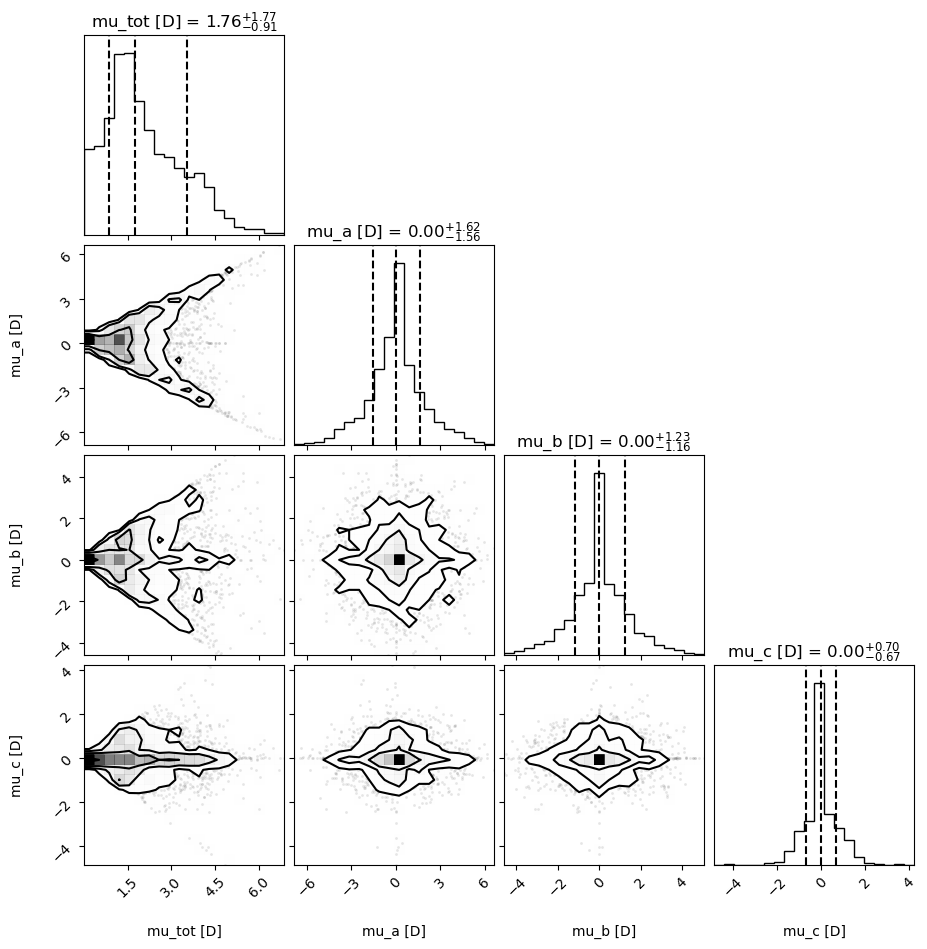

In [11]:
plot_corner_four_params(df_ground, ['mu_tot [D]','mu_a [D]', 'mu_b [D]', 'mu_c [D]']) # absolute value components

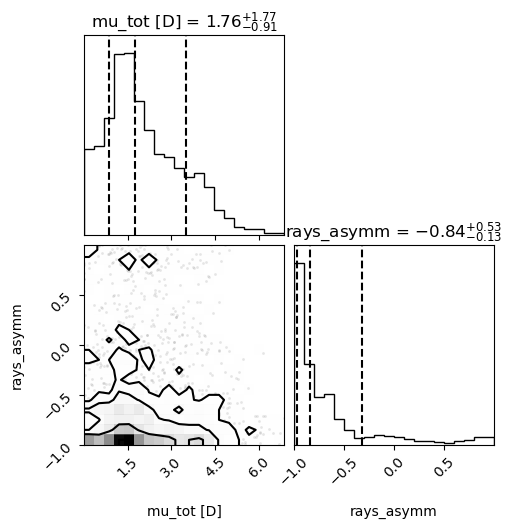

In [14]:
plot_corner_two_params(df_ground,['mu_tot [D]', 'rays_asymm']) # look up why prolate most observed, observational or abundance related?
                                                               # data set bias in creation for volatile species 

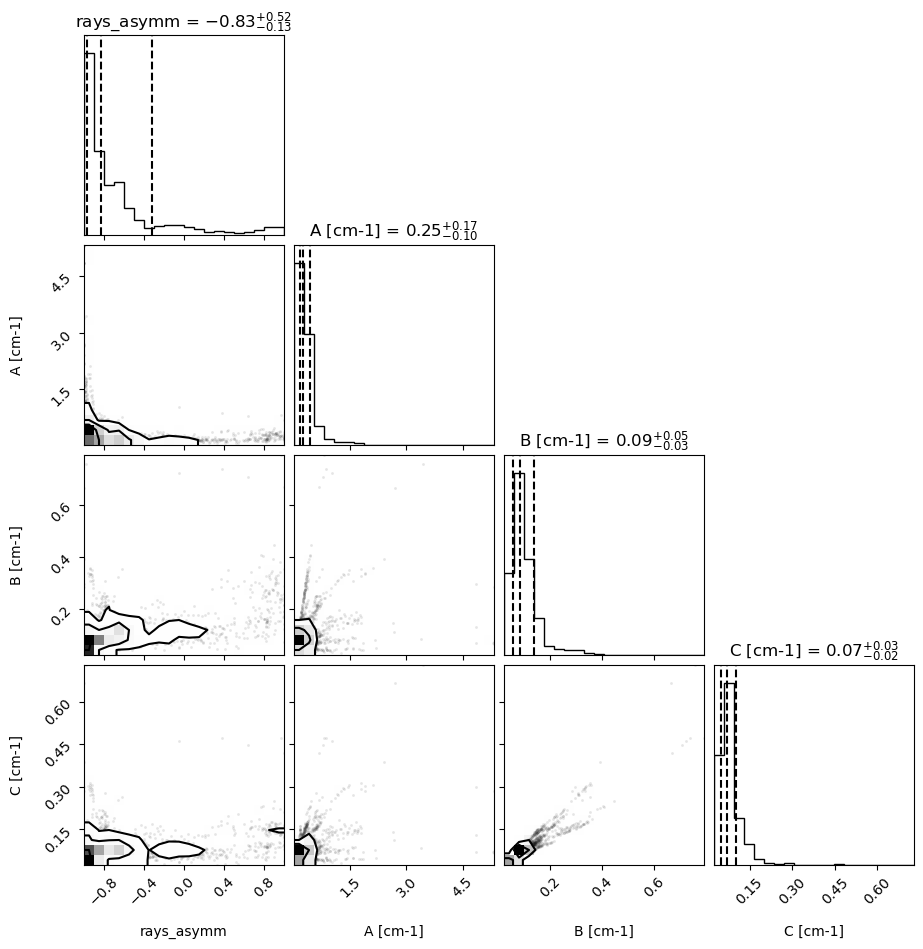

In [16]:
df_ground_less_six = df_ground[df_ground['# Atoms']>6]

plot_corner_four_params(df_ground_less_six,['rays_asymm', 'A [cm-1]', 'B [cm-1]', 'C [cm-1]']) # histograms, ratios?

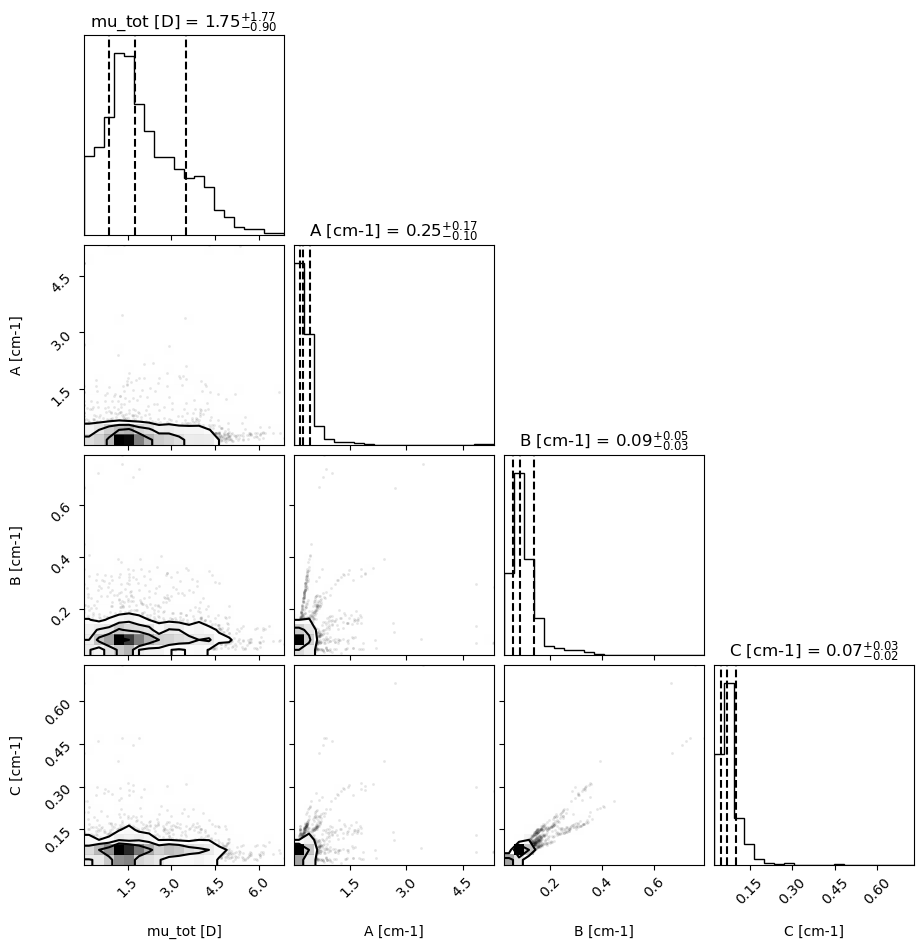

In [17]:
plot_corner_four_params(df_ground_less_six, ['mu_tot [D]','A [cm-1]', 'B [cm-1]', 'C [cm-1]'])